# `20181104a` - Phantom and probes - Processing

In [2]:
#!/usr/bin/python
import spidev
import time
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
%matplotlib inline
import os
from scipy.signal import hilbert, resample
import cv2

Not loading RPi.GPIO as not on RPi
pyexiv2 does not exist on RPi


995402 497701.0 497700
Data acquired
3210 155
PyExiv not present


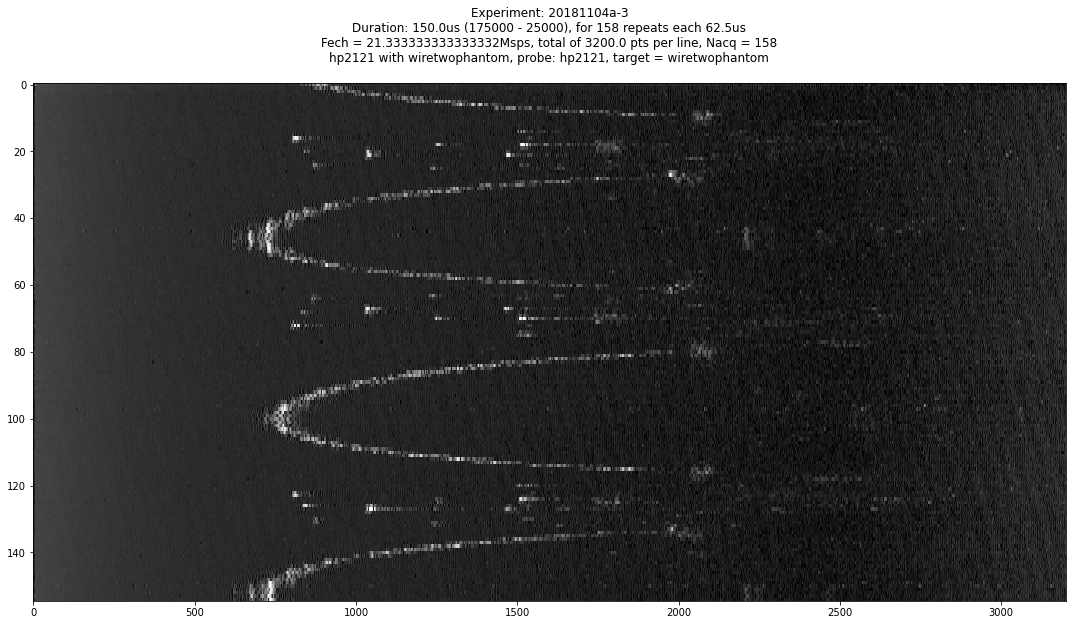

TypeError: slice indices must be integers or None or have an __index__ method

In [6]:
for MyDataFile in os.listdir("./"):
    if MyDataFile.endswith("3.json"):
        x = us_json()
        x.fPiezo = 4.1
        x.JSONprocessing("./"+MyDataFile)
        CleanImage = x.mk2DArray()
        S = x.mkSpectrum(CleanImage)
        F,FFTFil = x.mkFiltered(CleanImage)

## Cleaning the signal

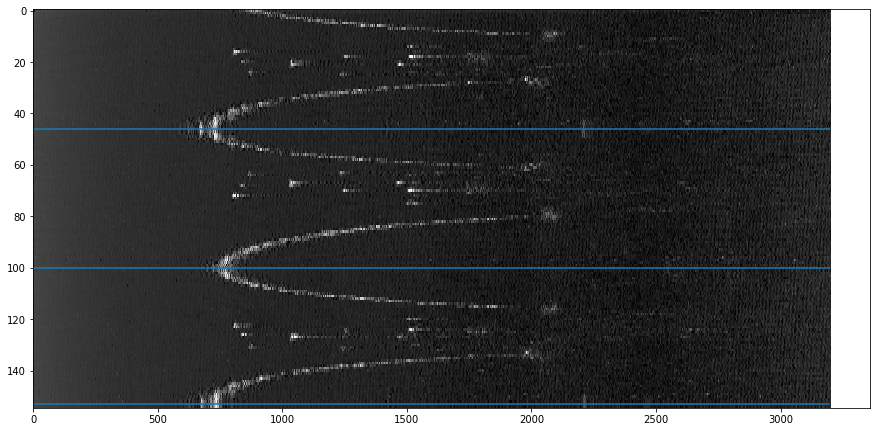

In [18]:
imSize = np.shape(CleanImage)
plt.figure(figsize = (15,10))
plt.imshow(np.sqrt(np.abs(CleanImage)), cmap='gray', aspect=0.5*(imSize[1]/imSize[0]), interpolation='nearest')
plt.hlines(46,0,len(CleanImage[0]))
m = (153+46)//2+1
plt.hlines(m,0,len(CleanImage[0]))
plt.hlines(153,0,len(CleanImage[0]))
plt.show() 

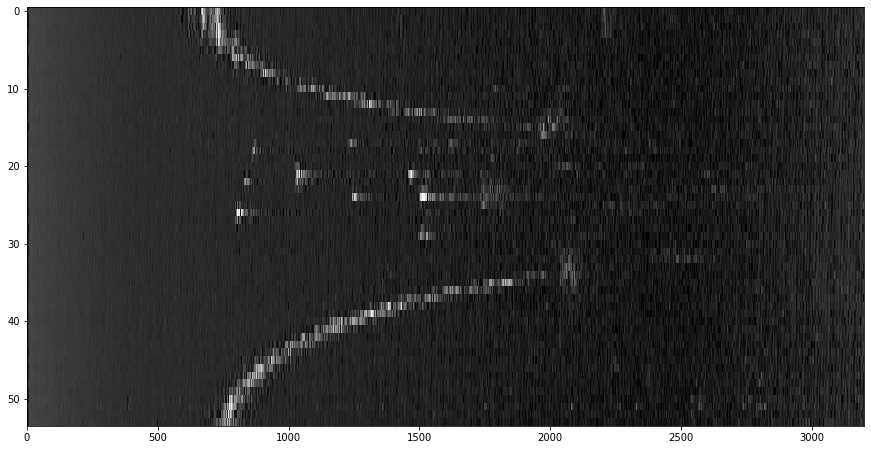

In [31]:
A = CleanImage[46:m]
imSize = np.shape(A)
plt.figure(figsize = (15,10))
plt.imshow(np.sqrt(np.abs(A)), cmap='gray', aspect=0.5*(imSize[1]/imSize[0]), interpolation='nearest')


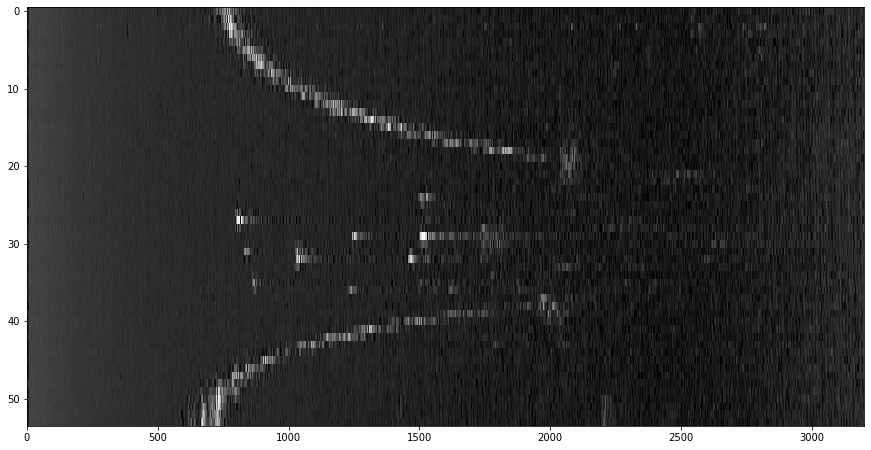

In [32]:
B = CleanImage[m:154]
imSize = np.shape(A)
plt.figure(figsize = (15,10))
plt.imshow(np.sqrt(np.abs(np.flip(A, 0))), cmap='gray', aspect=0.5*(imSize[1]/imSize[0]), interpolation='nearest')


In [33]:
np.savez("frames",img=np.array([A,B]))

In [34]:
np.shape(B)

(54, 3200)

## Image 1

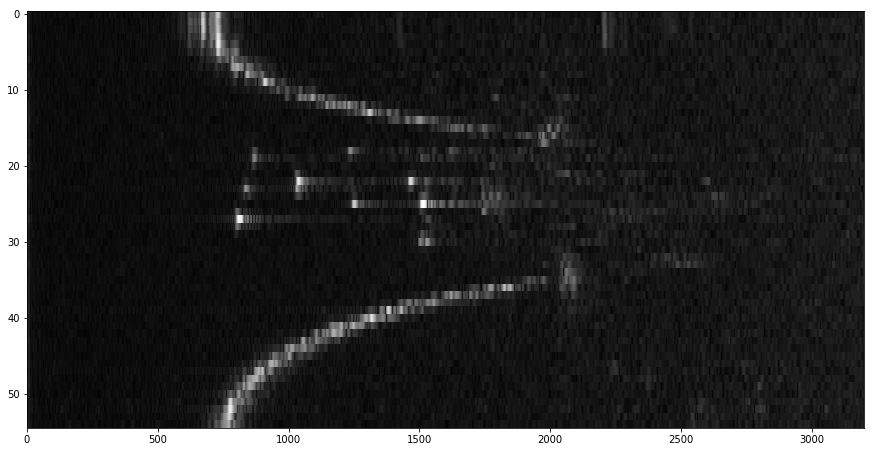

In [21]:
imSize = np.shape(CleanHilbert[45:100])
plt.figure(figsize = (15,10))
plt.imshow(np.sqrt(np.abs(CleanHilbert[45:100])), cmap='gray', aspect=0.5*(imSize[1]/imSize[0]), interpolation='nearest')
plt.show() 

## Image 2

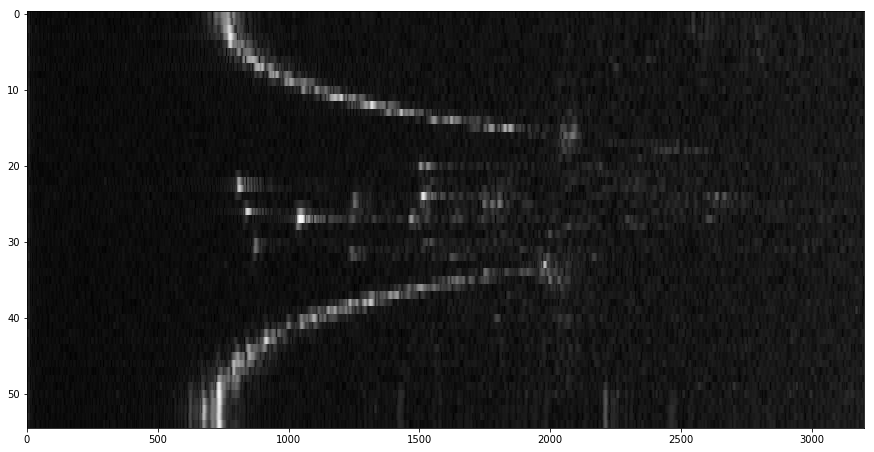

In [22]:
imSize = np.shape(CleanHilbert[100:])
plt.figure(figsize = (15,10))
plt.imshow(np.sqrt(np.abs(CleanHilbert[100:])), cmap='gray', aspect=0.5*(imSize[1]/imSize[0]), interpolation='nearest')
plt.show() 

In [42]:
25.0*64/3.0
a = np.asarray(CleanHilbert[45:100])
b = np.zeros((55,533+70)) #70 for the piezo offset
np.shape(a),np.shape(b)

((55, 3200), (55, 603))

In [43]:
c = np.c_[b,a]

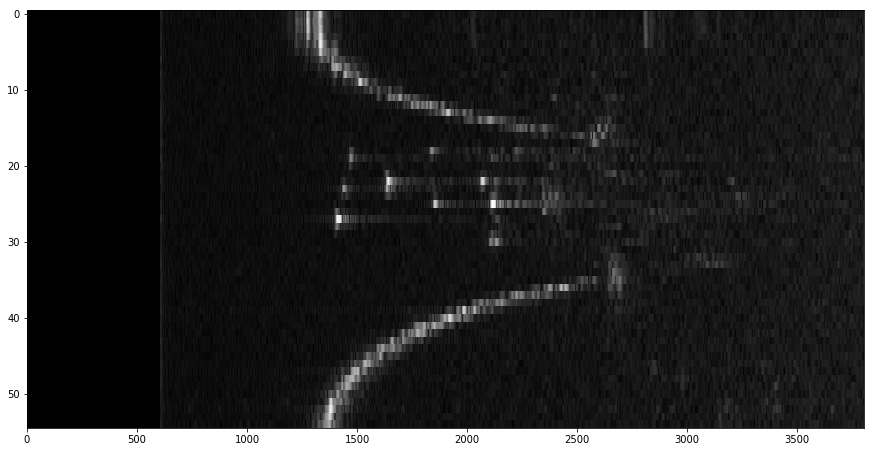

In [44]:
imSize = np.shape(c)
plt.figure(figsize = (15,10))
plt.imshow(np.sqrt(np.abs(c)), cmap='gray', aspect=0.5*(imSize[1]/imSize[0]), interpolation='nearest')
plt.show() 

# SCan COnversion

In [45]:
HMatrixCld = c
n,l = np.shape(HMatrixCld)
print n,l

55 3803


In [46]:
im_in = np.asarray(HMatrixCld[0:150,:])

im_in.shape[0],im_in.shape[1]



(55, 3803)

maxRadius = 3803 pixels
35.0140874802 rows per radian
theta: [2.35619449019, 3.92699081699] radians
Padding 41 above and 41 below
CPU times: user 2.54 s, sys: 1.26 s, total: 3.8 s
Wall time: 2.67 s


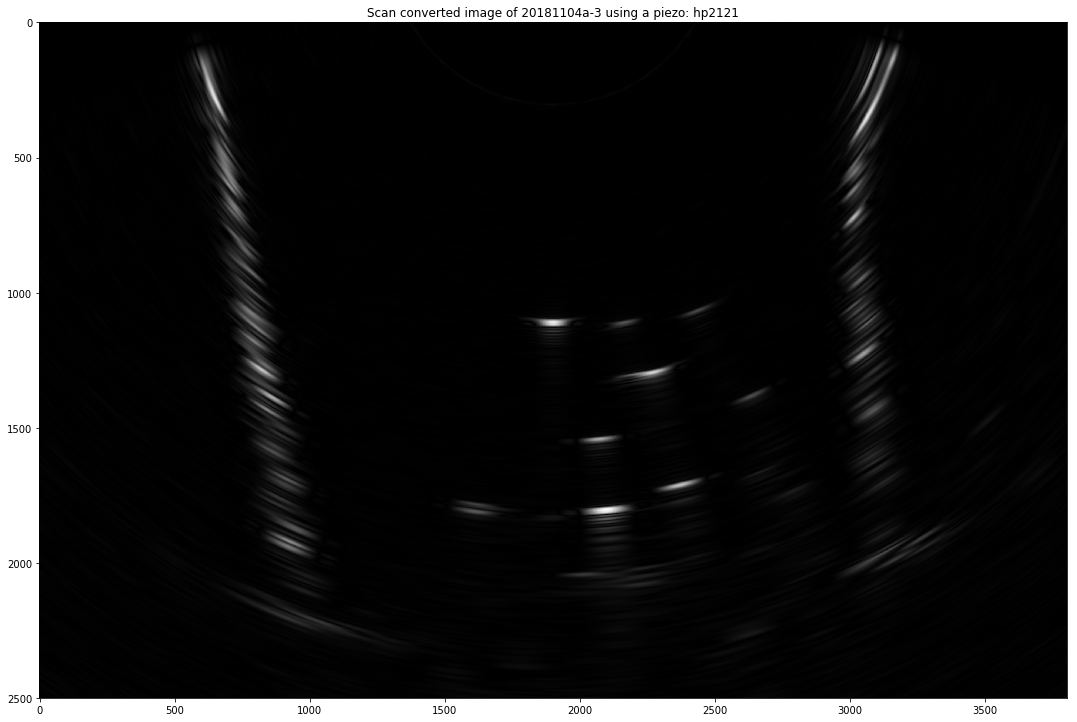

In [48]:
%%time

maxRadius = im_in.shape[1]
rows = im_in.shape[1]
print("maxRadius = {} pixels".format(maxRadius))

angle_range = np.pi/2 # range of angle swept by transducer (radians)
theta_scale_factor = im_in.shape[0] / angle_range # rows per radian
print("{} rows per radian".format(theta_scale_factor))
theta_min = 3/2*np.pi - angle_range/2
theta_max = 3/2*np.pi + angle_range/2
print("theta: [{}, {}] radians".format(theta_min, theta_max))

# pad the image
pad_below = int(0.5* theta_min * theta_scale_factor) # how many rows to pad below theta_min
pad_above = int(0.5* (2*np.pi - theta_max) * theta_scale_factor) # how mahy rows to pad above theta_max
print("Padding {} above and {} below".format(pad_above, pad_below))
im_below = np.zeros((pad_below, maxRadius), dtype='uint16')
im_above = np.zeros((pad_above, maxRadius), dtype='uint16')

padded_image = np.vstack((im_above, im_in, im_below))
# scale image
scaled_image = cv2.resize(padded_image, (2*maxRadius, maxRadius), interpolation=cv2.INTER_CUBIC)
#scaled_image = padded_image
# transform image
center = (rows-1000, rows/2)
maxRadius = rows
flags = cv2.WARP_INVERSE_MAP
dst = cv2.linearPolar(scaled_image, center, maxRadius, flags)
plt.figure(figsize = (15,15))
Title = "Scan converted image of "+x.iD + "-"+ str(x.N)+" using a piezo: "+x.piezo
plt.title( Title )
plt.tight_layout()
FileName = "images/SC_"+x.iD+"-"+str(x.N)+"-fft.jpg"
plt.imshow(np.flipud(np.transpose((np.abs(dst)))[:2500,:]), cmap='gray')
plt.savefig(FileName)
TagImage(FileName,"matty,hp2121,"+x.piezo,x.iD,"SC",Title)